
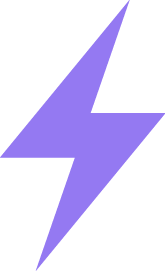

Running local mode, some functionality limited.



In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
pd.options.display.max_columns = 100
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#from citypairs.ipynb
df = pd.read_csv('distances.csv').sort_values('pop', ascending = False).drop_duplicates(['power'])

In [3]:
df.head()

Unnamed: 0  Unnamed: 0.1  level_0         2016        2016_x  \
114921      115222        115222      240  126994511.0  1.443424e+08   
124065      124390        124390      240  126994511.0  7.951243e+07   
66914        67090         67090      240  126994511.0  1.324171e+09   
33767        33856         33856      240  126994511.0  1.378665e+09   
19670        19722         19722      240  126994511.0  1.378665e+09   

       Country Code Country Code_x   city city_ascii city_ascii_x  \
114921          JPN            RUS  Tokyo      Tokyo  Chelyabinsk   
124065          JPN            TUR  Tokyo      Tokyo        Izmir   
66914           JPN            IND  Tokyo      Tokyo       Kalyan   
33767           JPN            CHN  Tokyo      Tokyo       Ningbo   
19670           JPN            CHN  Tokyo      Tokyo      Wanxian   

             city_x country country_x         index              index_x iso2  \
114921  Chelyabinsk   Japan    Russia  Tokyo, Japan  Chelyabinsk, Russia   JP   
124065        Izmir   Japan    Turkey  Tokyo, Japan        Izmir, Turkey   JP   
66914        Kalyan   Japan     India  Tokyo, Japan        Kalyan, India   JP   
33767        Ningbo   Japan     China  Tokyo, Japan        Ningbo, China   JP   
19670       Wanzhou   Japan     China  Tokyo, Japan       Wanzhou, China   JP   

       iso2_x iso3 iso3_x        lat      lat_x  level_0_x         lng  \
114921     RU  JPN    RUS  35.685017  55.154991        300  139.751407   
124065     TR  JPN    TUR  35.685017  38.436150        324  139.751407   
66914      IN  JPN    IND  35.685017  19.250232        174  139.751407   
33767      CN  JPN    CHN  35.685017  29.879971         87  139.751407   
19670      CN  JPN    CHN  35.685017  30.819991         50  139.751407   

             lng_x   percent  percent_x         pop      pop_x province  \
114921   61.438668  0.173285   0.007058  22006299.5  1018802.0    Tokyo   
124065   27.151794  0.173285   0.030875  22006299.5  2454909.0    Tokyo   
66914    73.160175  0.173285   0.001191  22006299.5  1576614.0    Tokyo   
33767   121.550038  0.173285   0.000958  22006299.5  1321433.5    Tokyo   
19670   108.400039  0.173285   0.001219  22006299.5  1680000.0    Tokyo   

         province_x  combined_pop     distance         power  
114921  Chelyabinsk    23025101.5  6136.666134   3752.053802  
124065        Izmir    24461208.5  9274.116097   2637.578422  
66914   Maharashtra    23582913.5  6703.591278   3517.952173  
33767      Zhejiang    23327733.0  1819.105929  12823.735345  
19670     Chongqing    23686299.5  2957.934359   8007.716409

In [4]:
concise = df.sort_values('power', ascending = False)[['Country Code','Country Code_x','city','city_x','pop','pop_x','combined_pop','distance','power']]
concise['same'] = np.where(concise['Country Code'] == concise['Country Code_x'], 'yes', 'no')

In [5]:
concise.head()

Country Code Country Code_x      city       city_x         pop  \
55772           EGY            EGY     Cairo      El Giza   9813807.0   
110780          PHL            PHL    Manila  Quezon City   7088787.5   
67269           IND            IND   Kolkata        Haora   9709196.0   
88250           JPN            JPN     Tokyo     Kawasaki  22006299.5   
48512           COD            COG  Kinshasa  Brazzaville   6704351.5   

            pop_x  combined_pop   distance         power same  
55772   2681863.0    12495670.0   7.284660  1.715340e+06  yes  
110780  2761720.0     9850507.5   7.258086  1.357177e+06  yes  
67269   2934655.0    12643851.0   9.474859  1.334463e+06  yes  
88250   1372025.5    23378325.0  17.707234  1.320270e+06  yes  
48512   1259445.0     7963796.5   8.493706  9.376115e+05   no

In [6]:
powerful = concise[concise['power'] > 100000]
print(powerful.shape)
print(concise.shape)

(47, 10)
(72771, 10)


In [8]:

# libraries
from mpl_toolkits.basemap import Basemap
# A basic map
m=Basemap(llcrnrlon=-100, llcrnrlat=20,urcrnrlon=30,urcrnrlat=70)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='orange')

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()

ax.coastlines()

plt.plot([-0.08, 132], [51.53, 43.17], color='red',  transform=ccrs.Geodetic())
plt.plot([-0.08, 132], [51.53, 43.17], color='blue', transform=ccrs.PlateCarree())

plt.show()

ModuleNotFoundError: No module named 'cartopy.crs'